- Kaggle: https://www.kaggle.com/mohansacharya/graduate-admissions
- Panda Visualization Docs: https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html
- Matplotlib visualization Docs: https://matplotlib.org/


- GRE: out of 340
- TOEFL: out of 120
- University Rating: out of 5
- SOP (Statement of Purpose) Strength: out of 5
- LOR (Letter of Reference) Strength: out of 5
- CGPA (Undergraduate GPA): out of 10
- Research: 0 or 1
- Chance of Admit: 0 or 1

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sys
import os

In [2]:
df = pd.read_csv("./Admission_Predict_Ver1.1.csv",sep = ",")



## Clean the headers

In [3]:
headers = list(df.columns.values)
headers_clean = []

for header in headers:
    #print('[{}]'.format(header))
    headers_clean.append(header.strip())

df.columns = headers_clean



In [4]:
df.head()



,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


## Take a look at the data in general

In [5]:
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
Serial No.           500 non-null int64
GRE Score            500 non-null int64
TOEFL Score          500 non-null int64
University Rating    500 non-null int64
SOP                  500 non-null float64
LOR                  500 non-null float64
CGPA                 500 non-null float64
Research             500 non-null int64
Chance of Admit      500 non-null float64
dtypes: float64(4), int64(5)
memory usage: 35.2 KB


In [6]:
df.describe()



,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


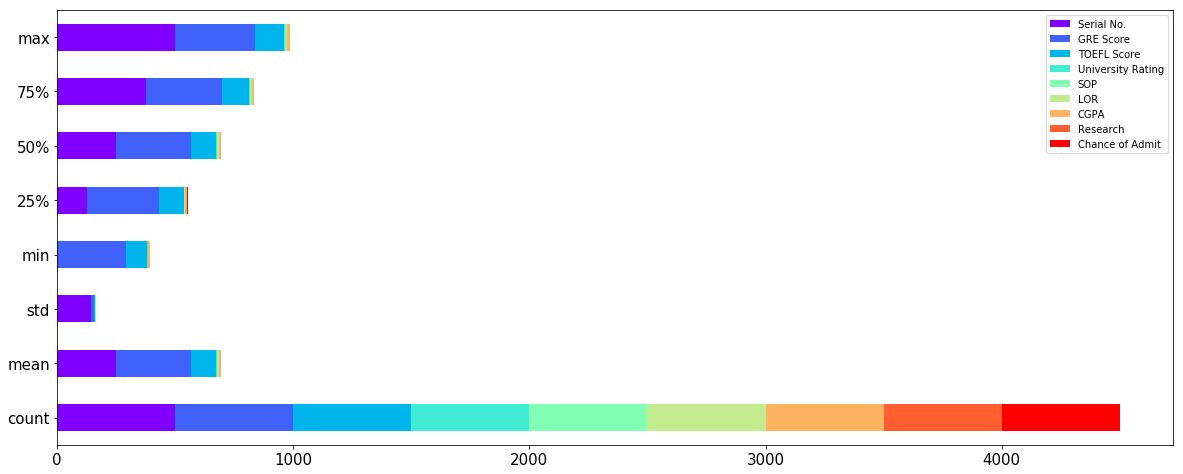

In [7]:
# Visualize df.describe()
df.describe().plot(kind = "barh",fontsize=15, figsize = (20,8), colormap="rainbow", stacked=True)
#plt.xlabel('Statistics',)
#plt.ylabel('Value')
#plt.title("General Statistics of Admissions")



## Remove serial number column

In [8]:
df.drop('Serial No.', axis=1, inplace=True)
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


## Take a look at each column

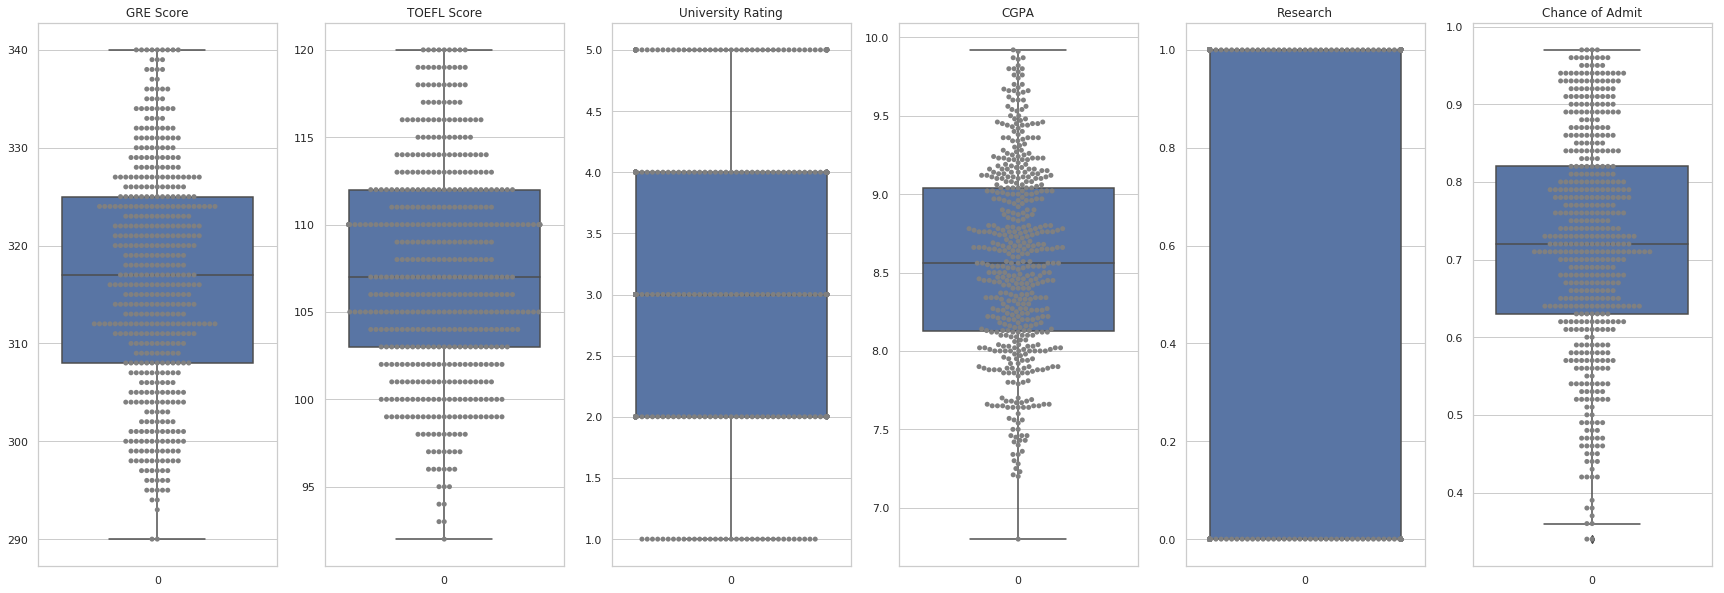

In [9]:
# Visualize data 
sns.set(style="whitegrid")
plt.figure(1, figsize=(30,10))

plt.subplot(1,6, 1)
ax = sns.boxplot(data=df['GRE Score']).set_title('GRE Score')
ax = sns.swarmplot(data=df['GRE Score'], color="grey")

plt.subplot(1,6, 2)
ax = sns.boxplot(data=df['TOEFL Score']).set_title('TOEFL Score')
ax = sns.swarmplot(data=df['TOEFL Score'], color="grey")

plt.subplot(1,6, 3)
ax = sns.boxplot(data=df['University Rating']).set_title('University Rating')
ax = sns.swarmplot(data=df['University Rating'], color="grey")

plt.subplot(1,6, 4)
ax = sns.boxplot(data=df['CGPA']).set_title('CGPA')
ax = sns.swarmplot(data=df['CGPA'], color="grey")

plt.subplot(1,6, 5)
ax = sns.boxplot(data=df['Research']).set_title('Research')
ax = sns.swarmplot(data=df['Research'], color="grey")

plt.subplot(1,6, 6)
ax = sns.boxplot(data=df['Chance of Admit']).set_title('Chance of Admit')
ax = sns.swarmplot(data=df['Chance of Admit'], color="grey")



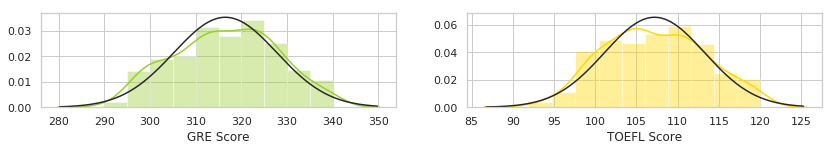

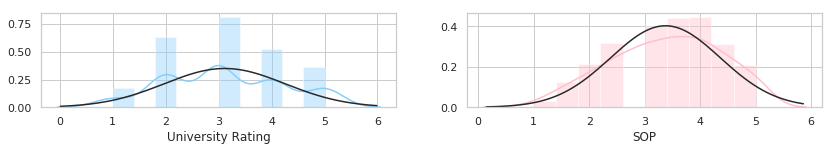

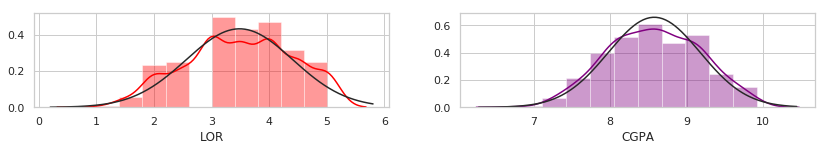

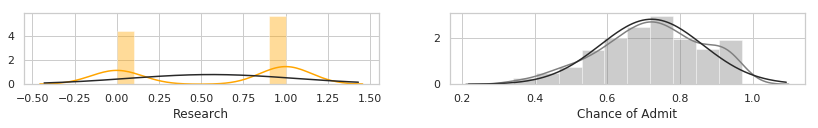

In [10]:
from scipy.stats import norm

category = ['GRE Score','TOEFL Score','University Rating','SOP','LOR','CGPA','Research','Chance of Admit']
color = ['yellowgreen','gold','lightskyblue','pink','red','purple','orange','gray']

start = True
for i in np.arange(4):
    
    if start == True:
        fig = plt.figure(figsize=(14,8))
        #start = False
        
    plt.subplot2grid((4,2),(i,0))
    sns.distplot(df[category[2*i]], fit=norm, kde=True, bins=10, color=color[2*i])
    #plt.title(category[2*i])
    
    plt.subplot2grid((4,2),(i,1))
    sns.distplot(df[category[2*i+1]],fit=norm, kde=True, bins=10, color=color[2*i+1])
    #plt.title(category[2*i+1])
    
plt.subplots_adjust(hspace = 0.7, wspace = 0.2)    
plt.show()

## Analyze Correlation

In [11]:
df.corr()



,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL Score,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University Rating,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance of Admit,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


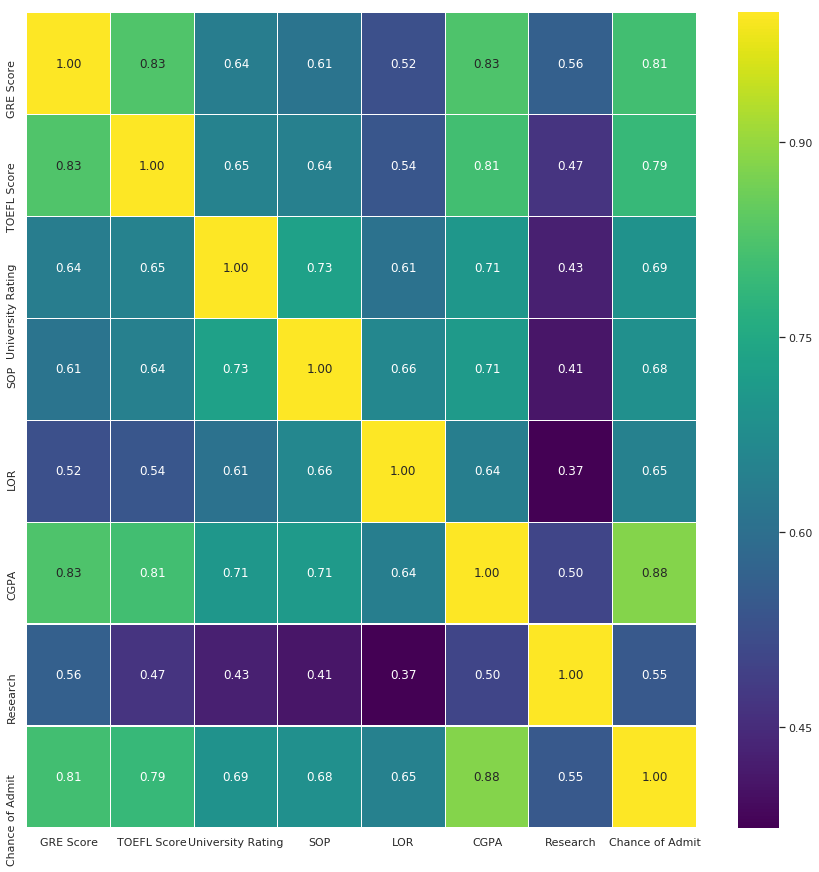

In [12]:
# Visualize df.corr()

fig,ax = plt.subplots(figsize=(15, 15))
sns.heatmap(df.corr(), ax=ax, annot=True, linewidths=0.1, fmt= '.2f',cmap="viridis")
plt.show()



- All fields have low correlation with Serial No. It means Serial No. can be removed from the analysis.

In [13]:
cor=df.corr()['Chance of Admit']
cor

GRE Score            0.810351
TOEFL Score          0.792228
University Rating    0.690132
SOP                  0.684137
LOR                  0.645365
CGPA                 0.882413
Research             0.545871
Chance of Admit      1.000000
Name: Chance of Admit, dtype: float64

## Research

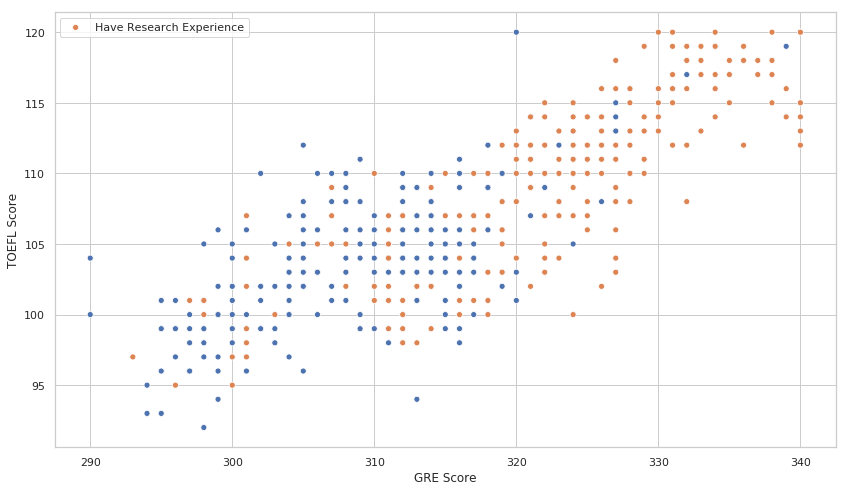

In [14]:
fig = plt.figure(figsize = (14,8))

sns.scatterplot(
    data = df, 
    x = 'GRE Score', 
    y = 'TOEFL Score', 
    hue = 'Research'
).legend(['Have Research Experience'])



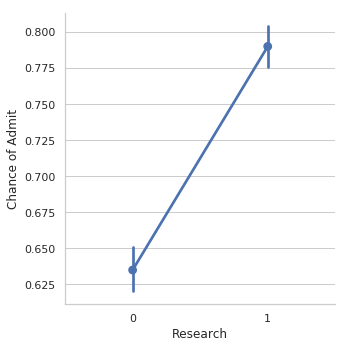

In [15]:
sns.catplot('Research','Chance of Admit',data = df, kind = "point")



## Analyze conditions for getting 90% chance of admit

In [16]:
admt_sort = df.sort_values(by = df.columns[-1], ascending = False).head()



In [17]:
admt_sort[(admt_sort['Chance of Admit'] > 0.90)].mean().reset_index()

,index,0
0,GRE Score,337.200
1,TOEFL Score,118.200
2,University Rating,4.800
3,SOP,4.400
4,LOR,4.400
5,CGPA,9.852
6,Research,1.000
7,Chance of Admit,0.968


# Machine Learning

In [18]:
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix

## Linear Regression

In [19]:
X = df.iloc[:,:-1].values
X[0]

array([ 337.  ,  118.  ,    4.  ,    4.5 ,    4.5 ,    9.65,    1.  ])

In [20]:
y = df.iloc[:,-1].values
y[0]

0.92000000000000004

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.05,random_state=0)

In [22]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
reg=linear_model.LinearRegression()
reg.fit(X_train,y_train)
pred1=reg.predict(X_test)
print("Mean Squared Error: ",mean_squared_error(y_test,pred1))
#('Accuracy for Linear Regression is ',metrics.accuracy_score(y_pred,y_test))

Mean Squared Error:  0.00231874423413


In [23]:
y_test

array([ 0.64,  0.85,  0.8 ,  0.91,  0.68,  0.54,  0.54,  0.65,  0.52,
        0.79,  0.65,  0.74,  0.64,  0.79,  0.89,  0.43,  0.81,  0.73,
        0.8 ,  0.58,  0.57,  0.74,  0.6 ,  0.93,  0.88])

In [24]:
pred1

array([ 0.65681504,  0.82967416,  0.77745486,  0.87514165,  0.60939091,
        0.64804171,  0.53550954,  0.69668941,  0.52976885,  0.74191947,
        0.613215  ,  0.71123893,  0.62206105,  0.75758328,  0.87807215,
        0.5190342 ,  0.81852056,  0.63993174,  0.7623532 ,  0.53525166,
        0.51876318,  0.71724606,  0.52357412,  0.91784037,  0.83612765])

In [25]:
Score=['337','118','4','4.5','4.5','9.65','1']
Score=pd.DataFrame(Score).T
chance=reg.predict(Score)
chance

array([ 0.95074703])

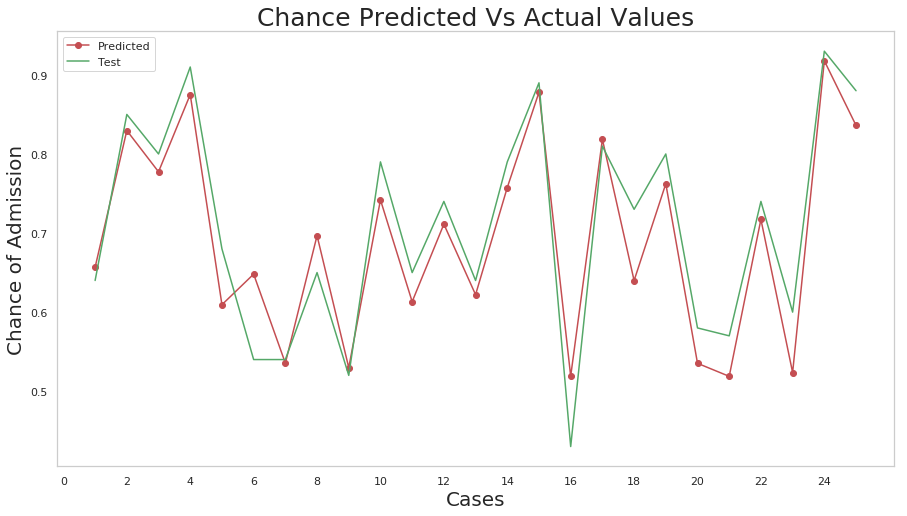

In [26]:
plt.figure(figsize=(15,8))
y = pred1
y1 = y_test
x = np.arange(1, 26, 1)
x1 = np.arange(0,26,2)
plt.plot(x, y, color='r', marker='o', label='Predicted')
plt.plot(x, y1, color='g', label='Actual')
plt.xticks(x1)
plt.gca().legend(('Predicted','Test'))
plt.xlabel('Cases', fontsize=20)
plt.ylabel('Chance of Admission', fontsize=20)
plt.title('Chance Predicted Vs Actual Values', fontsize=25)
plt.grid()
plt.ioff()

## SVM

In [27]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [28]:
def modiffy(row):
    if row['Chance of Admit'] >0.7 :
        return 1
    else :
        return 0
df['Admit'] = df.apply(modiffy,axis=1)
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,Admit
0,337,118,4,4.5,4.5,9.65,1,0.92,1
1,324,107,4,4.0,4.5,8.87,1,0.76,1
2,316,104,3,3.0,3.5,8.00,1,0.72,1
3,322,110,3,3.5,2.5,8.67,1,0.80,1
4,314,103,2,2.0,3.0,8.21,0,0.65,0


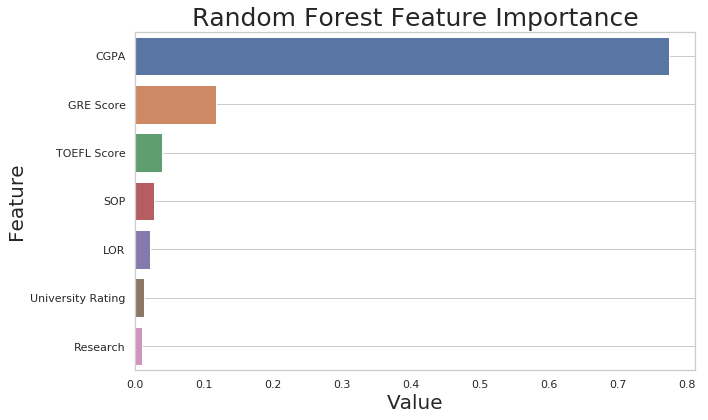

In [29]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators = 1000,random_state = 123)
columns = ['Admit']
df.drop(columns, inplace=True, axis=1)
X = df.drop('Chance of Admit',axis = 1)
y = df['Chance of Admit']
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size = .25,random_state = 123)
rf_model = RandomForestRegressor(n_estimators = 1000,random_state = 123)
rf_model.fit(X_train,y_train)
feature_importance = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns)), columns=['Value','Feature'])
plt.figure(figsize=(10, 6))
sns.barplot(x="Value", y="Feature", data=feature_importance.sort_values(by="Value", ascending=False))
plt.xlabel('Value',fontsize=20)
plt.ylabel('Feature',fontsize=20)
plt.title('Random Forest Feature Importance',fontsize=25)
plt.grid()
plt.ioff()
plt.tight_layout()

## Predicting the chance of admission using ANN

In [30]:
df.loc[df['Chance of Admit']>=0.5,['Chance of Admit']]=1
df.loc[df['Chance of Admit']<0.5,['Chance of Admit']]=0



In [31]:
import keras

X = df[['GRE Score','TOEFL Score','University Rating','SOP','LOR','CGPA','Research']]
# labels y are one-hot encoded, so it appears as two classes 
y = keras.utils.to_categorical(np.array(df["Chance of Admit"]))



Using TensorFlow backend.


In [32]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=100)



In [33]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation


model = Sequential()
model.add(Dense(64, input_dim=7))
model.add(Activation('sigmoid'))
model.add(Dense(32))
model.add(Activation('sigmoid'))
model.add(Dense(2))
model.add(Activation('sigmoid'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                512       
_________________________________________________________________
activation_1 (Activation)    (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
activation_2 (Activation)    (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 66        
_________________________________________________________________
activation_3 (Activation)    (None, 2)                 0         
Total params: 2,658
Trainable params: 2,658
Non-trainable params: 0
_________________________________________________________________


In [34]:
score = model.evaluate(X_test, y_test)
print(score)



150/150 [==============================] - 0s 395us/step
[1.1418160613377888, 0.086666667660077412]


## 10-fold cross validation with loss="binary_crossentropy"

In [35]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import StratifiedKFold
import numpy


seed = 7
numpy.random.seed(seed)

X = df.iloc[:,:-1].values
# labels y are one-hot encoded, so it appears as two classes 
y = df.iloc[:,-1].values

# define 10-fold cross validation test harness
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
cvscores = []

for train, test in kfold.split(X, y):
    model = Sequential()
    model.add(Dense(128, input_dim=7, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    # Fit the model
    model.fit(X[train], y[train], epochs=150, batch_size=10, verbose=0)
    
    # evaluate the model
    scores = model.evaluate(X[test], y[test], verbose=0)
    
    print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    cvscores.append(scores[1] * 100)

print("%.2f%% (+/- %.2f%%)" % (numpy.mean(cvscores), numpy.std(cvscores)))


acc: 92.16%
acc: 92.16%
acc: 92.16%
acc: 92.00%
acc: 92.00%
acc: 92.00%
acc: 92.00%
acc: 93.88%
acc: 6.12%
acc: 93.88%
83.83% (+/- 25.91%)
